##  Segment and Cluster Neighbourhoods in Toronto
### IBM/Coursera Applied Datascience Capstone

This Project Notebook assignment is Part 1 of 3 for Week 3: Applied Datascience Capstone Course assignment. 


## Part 1 of 3 Goal

Part one goal is to scrape Wikipedia Canada postal code information required to explore and cluster neighbourhoods in Toronto and to wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured dataset format. Once the data is in a structured format, we explore and cluster the neighborhoods in the city of Toronto.



## Part 1 Steps

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3>


Load url into data objects for analysis: 
    
[Step 1](#1) Build code to scrape following wikipedia page</a>
    https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, 
    in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown in image below:
    

 Wrangle and clean data:
    
[Step 2](#2) Evaluate each of the data table objects created during url loading for needs analysis.
    
[Step 3](#3) Designate primary dataframe and populate with required data objects loaded from url.
    
[Step 4](#4) Ensure Borough (town) cells with an assigned borough are processed. Cells where borough = 'Not assigned' are ignored. 
    
[Step 5](#5) When two or more neighborhoods share the same postal code, combine each neighbourhood to a single neighborhood line comma delimited.
    
[Step 6](#6) If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
    
[Step 7](#7) Use the .shape method to print the number of rows in the dataframe.
</font>
</div>

Capture2.PNG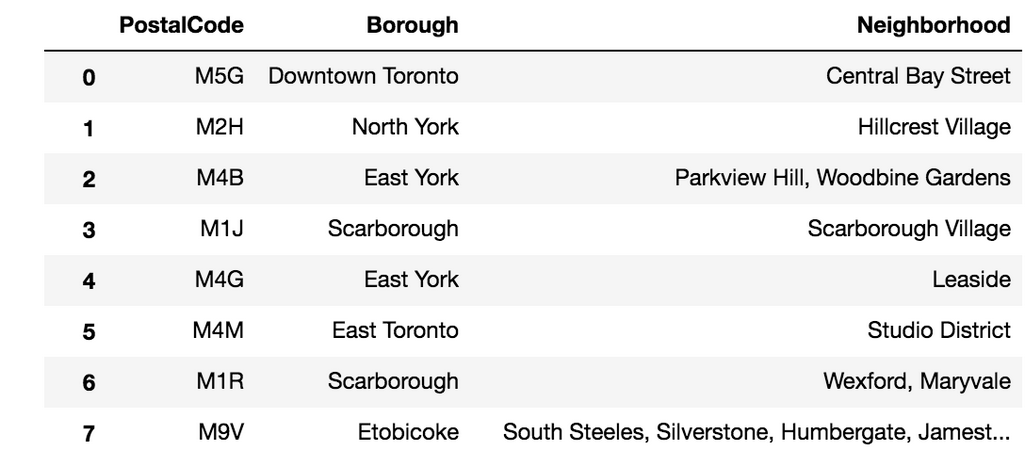

Load url into data objects for analysis: 

- <a id="1">Step 1: Build code to scrape following wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the Postal Code, Borough, and Neighborhood data as shown in the postal code table image above.</a>

In [1]:
# Load url into data objects for analysis: 
import pandas as pd #library for data analysis
data = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

Wrangle and clean data:

- <a id="2">Step 2: Evaluate each of the data table objects in turn that we created during url loading.</a>
- <a id="3">Step 3: Designate primary dataframe and populate with required data objects loaded from url.</a>

In [2]:
# Explore first few rows of our initial data[0] table
# Create df, primary dataframe, merged from data[0].
# Designate df as primary dataframe. 

df = data[0]
df.head(5)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


####  Summary: 
- The first dataframe object data[0] created by html reader has the 3 column names we require, and is populated with 180 rows of data.
- data[1] and data[2], our second and third imported dataframe objects, were both created during scraping by read_html and evaluated to see if any data is required of them. Both of the data sets contain Canada province/state higher level information, not in scope for our Toronto City level model, therefore are not used.
- Steps 1 thru 3 are complete.

- <a id="4">Step 4: Ensure Borough (town) cells with an assigned borough are processed. Cells where borough = 'Not assigned' are ignored.</a>

In [3]:
#Identify cell counts for each Borough. 
# We see 77 Borough cells where name is 'Not Assigned
print(df.Borough.value_counts()) 

Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64


In [4]:
# Remove 'Not assigned" count data on Borough
df = df[df['Borough'] != 'Not assigned']
print(df.Borough.value_counts())

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East Toronto         5
East York            5
Mississauga          1
Name: Borough, dtype: int64


#### Summary:
- 77 row counts found above identified where Borough column has 'Not Assigned' row value.
- After applying Step 4, 77 'Not assigned' rows are successfully removed for Borough column
- Step 4 is complete.

<a id="5">Step 5: When two or more Neighborhoods share the same postal code, combine each Neighbourhood to a single neighborhood line comma delimited.

In [5]:
# I first perform a count sum of any df column duplicates by creating a lambda function. 
dup_chk = df.apply(lambda col: col.duplicated()).sum()
print(dup_chk)
print(df.head(5))

Postal Code       0
Borough          93
Neighbourhood     4
dtype: int64
  Postal Code           Borough                                Neighbourhood
2         M3A        North York                                    Parkwoods
3         M4A        North York                             Victoria Village
4         M5A  Downtown Toronto                    Regent Park, Harbourfront
5         M6A        North York             Lawrence Manor, Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government


#### Summary: 
1. The dup_chk function returned a 0 sum of Postal Code column duplicates, therefore no condition of two or more Neighborhoods sharing same Postal Code value exists within dataframe, hence need to perform the combine step.
2. Further, the first 5 rows of our dataframe provides a few examples where multiple neighbourhoods are comma delimited, are grouped on single lines, and share a common Postal Code between them as required. So the notion of having a neighbor combination method with multiple neighbourhoods on same line is already working as desired without any coding needed.
3. In summary, the identified duplication behavior across rows for multiple neighbourhoods appears to have been resolved in latest wiki url of Toronto postal codes loaded to our frame using pandas html_viewer approach.
4. Step 5 behaviour was reviewed with no eligible cases found of same postal code shared. Complete.

<a id="6">Step 6: If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [6]:
#List all rows where Neighbourhood = 'Not assigned'. 
Num_Neighbourhood_Not_Assigneds = df[df['Neighbourhood'] == 'Not assigned']
Num_Neighbourhood_Not_Assigneds.head(5)

,Postal Code,Borough,Neighbourhood


#### Summary: 
1. No applicable 'Not assigned" Neighborhood cases found where Neighbourhood cells needed to be filled with Borough value.
3. Step 6 reviewed for eligible 'Not assigned' cases where none were found. No value assignment required. Complete.

Step 7<a id="7">: Use .shape method to print number of rows of dataframe

In [7]:
print(df.shape, 'rows x cols')

(103, 3) rows x cols


Save final dataframe to csv file to make available for next phase part 2 import.

In [8]:
#Create a Wk3:PostalDataPart1.csv file we will use for Wk3: Part 2.
df.to_csv('Wk3PostalDataPart1.csv', index=False)

#Test csv load
df2 = pd.read_csv('./Wk3PostalDataPart1.csv')
df2.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


#### Summary: 
- Net of 103 net rows of data, after 77 borough 'Not Assigned' rows were removed from initial 180 rows reported during initial step.
- Dataframe is ready for integration with next Part 2 assignment.

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font size = 3>
This concludes Week 3: Part 1 of 3 assignment.